# ST451 Bayesian Machine Learning

Final Project about Bayesian breast cancer classification (Part I)

This file contains the following models:

Classification:
- Naive Bayes
- Gaussian Process Classification

Regression:
- Logistic Regression
- Gaussian Process Regression

The code for the Bayesian Neural Network can be found in the other notebook (Part II).

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
data = load_breast_cancer()

In [5]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [6]:
X = data.data
y = data.target # 0 = malignant, 1 = benign

In [7]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Analysis

In [7]:
data_frame = load_breast_cancer(as_frame=True)
X_frame = data_frame.data
y_frame = data_frame.target # 0 = malignant, 1 = benign

In [8]:
X_frame.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [9]:
def plotCorrelationMatrix(df, graphWidth):
    filename = data_frame.feature_names
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

/var/folders/v7/0072jtpn0b7_fjl4b2k9zsf00000gn/T/ipykernel_99381/223902106.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


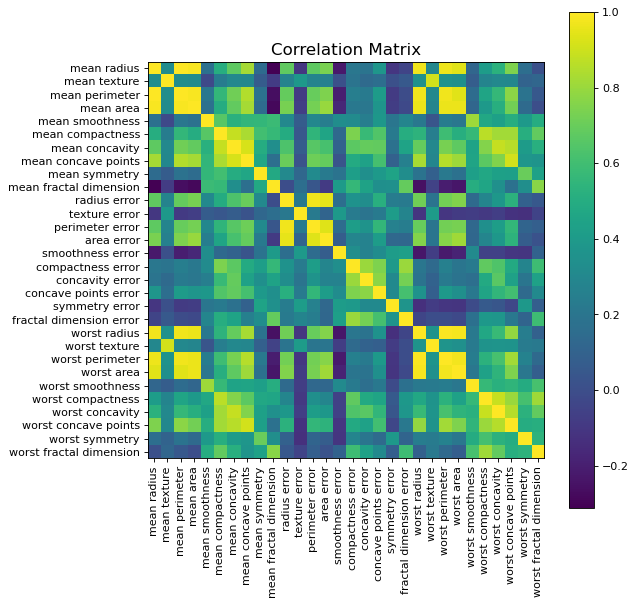

In [10]:
plotCorrelationMatrix(X_frame, 8);

In [11]:
y_frame.name="Class"
df1=pd.concat([X_frame, y_frame], axis=1)
m_col = ['Class','mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']

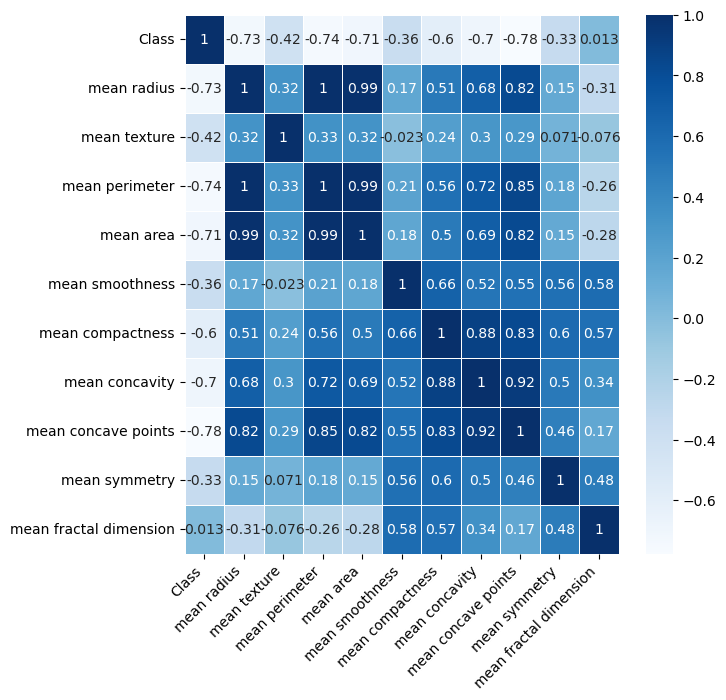

In [12]:
plt.figure(figsize=(7,7))
ax=sns.heatmap(df1[m_col].corr(),annot=True,linewidth=.5,cmap="Blues")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right');

Number of Benign:  357
Number of Malignant :  212


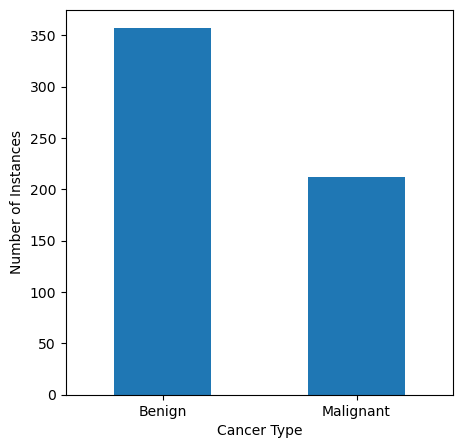

In [13]:
plt.figure(figsize=(5,5));
abc = y_frame.value_counts();
abc.plot.bar();
plt.xlabel("Cancer Type");
plt.ylabel("Number of Instances");
plt.xticks([0,1], ['Benign', 'Malignant'],rotation=0);
print('Number of Benign: ',abc[1])
print('Number of Malignant : ',abc[0])

In [14]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr= %.3f' % corrs[i, j], (0.7, 0.1), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

/var/folders/v7/0072jtpn0b7_fjl4b2k9zsf00000gn/T/ipykernel_99381/2753700054.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


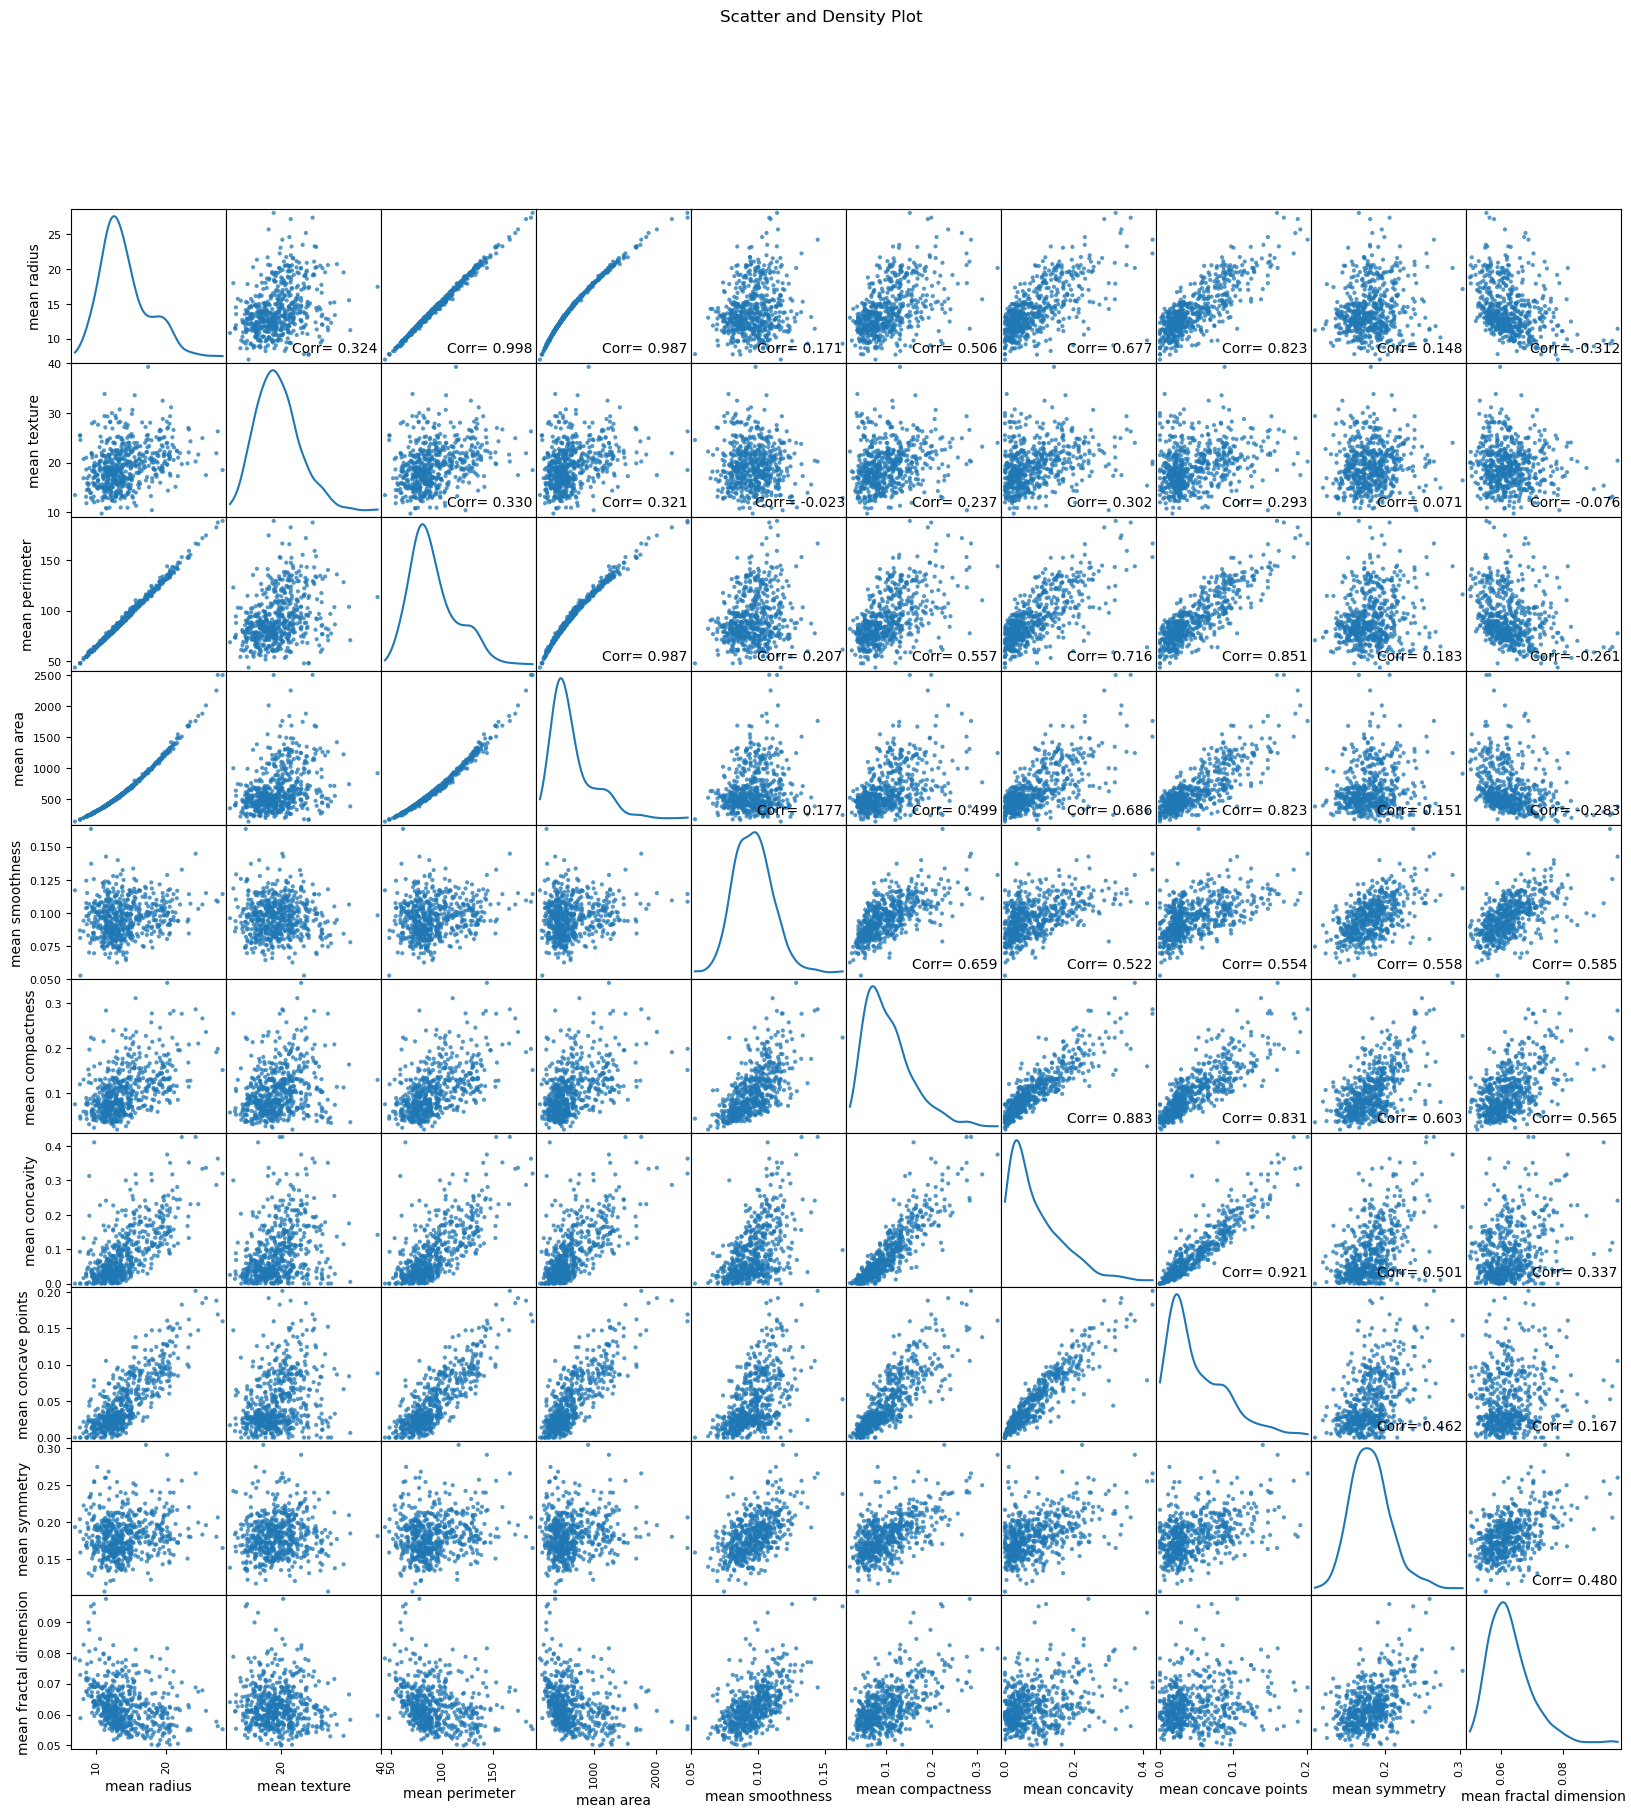

In [15]:
plotScatterMatrix(X_frame, 20, 10)

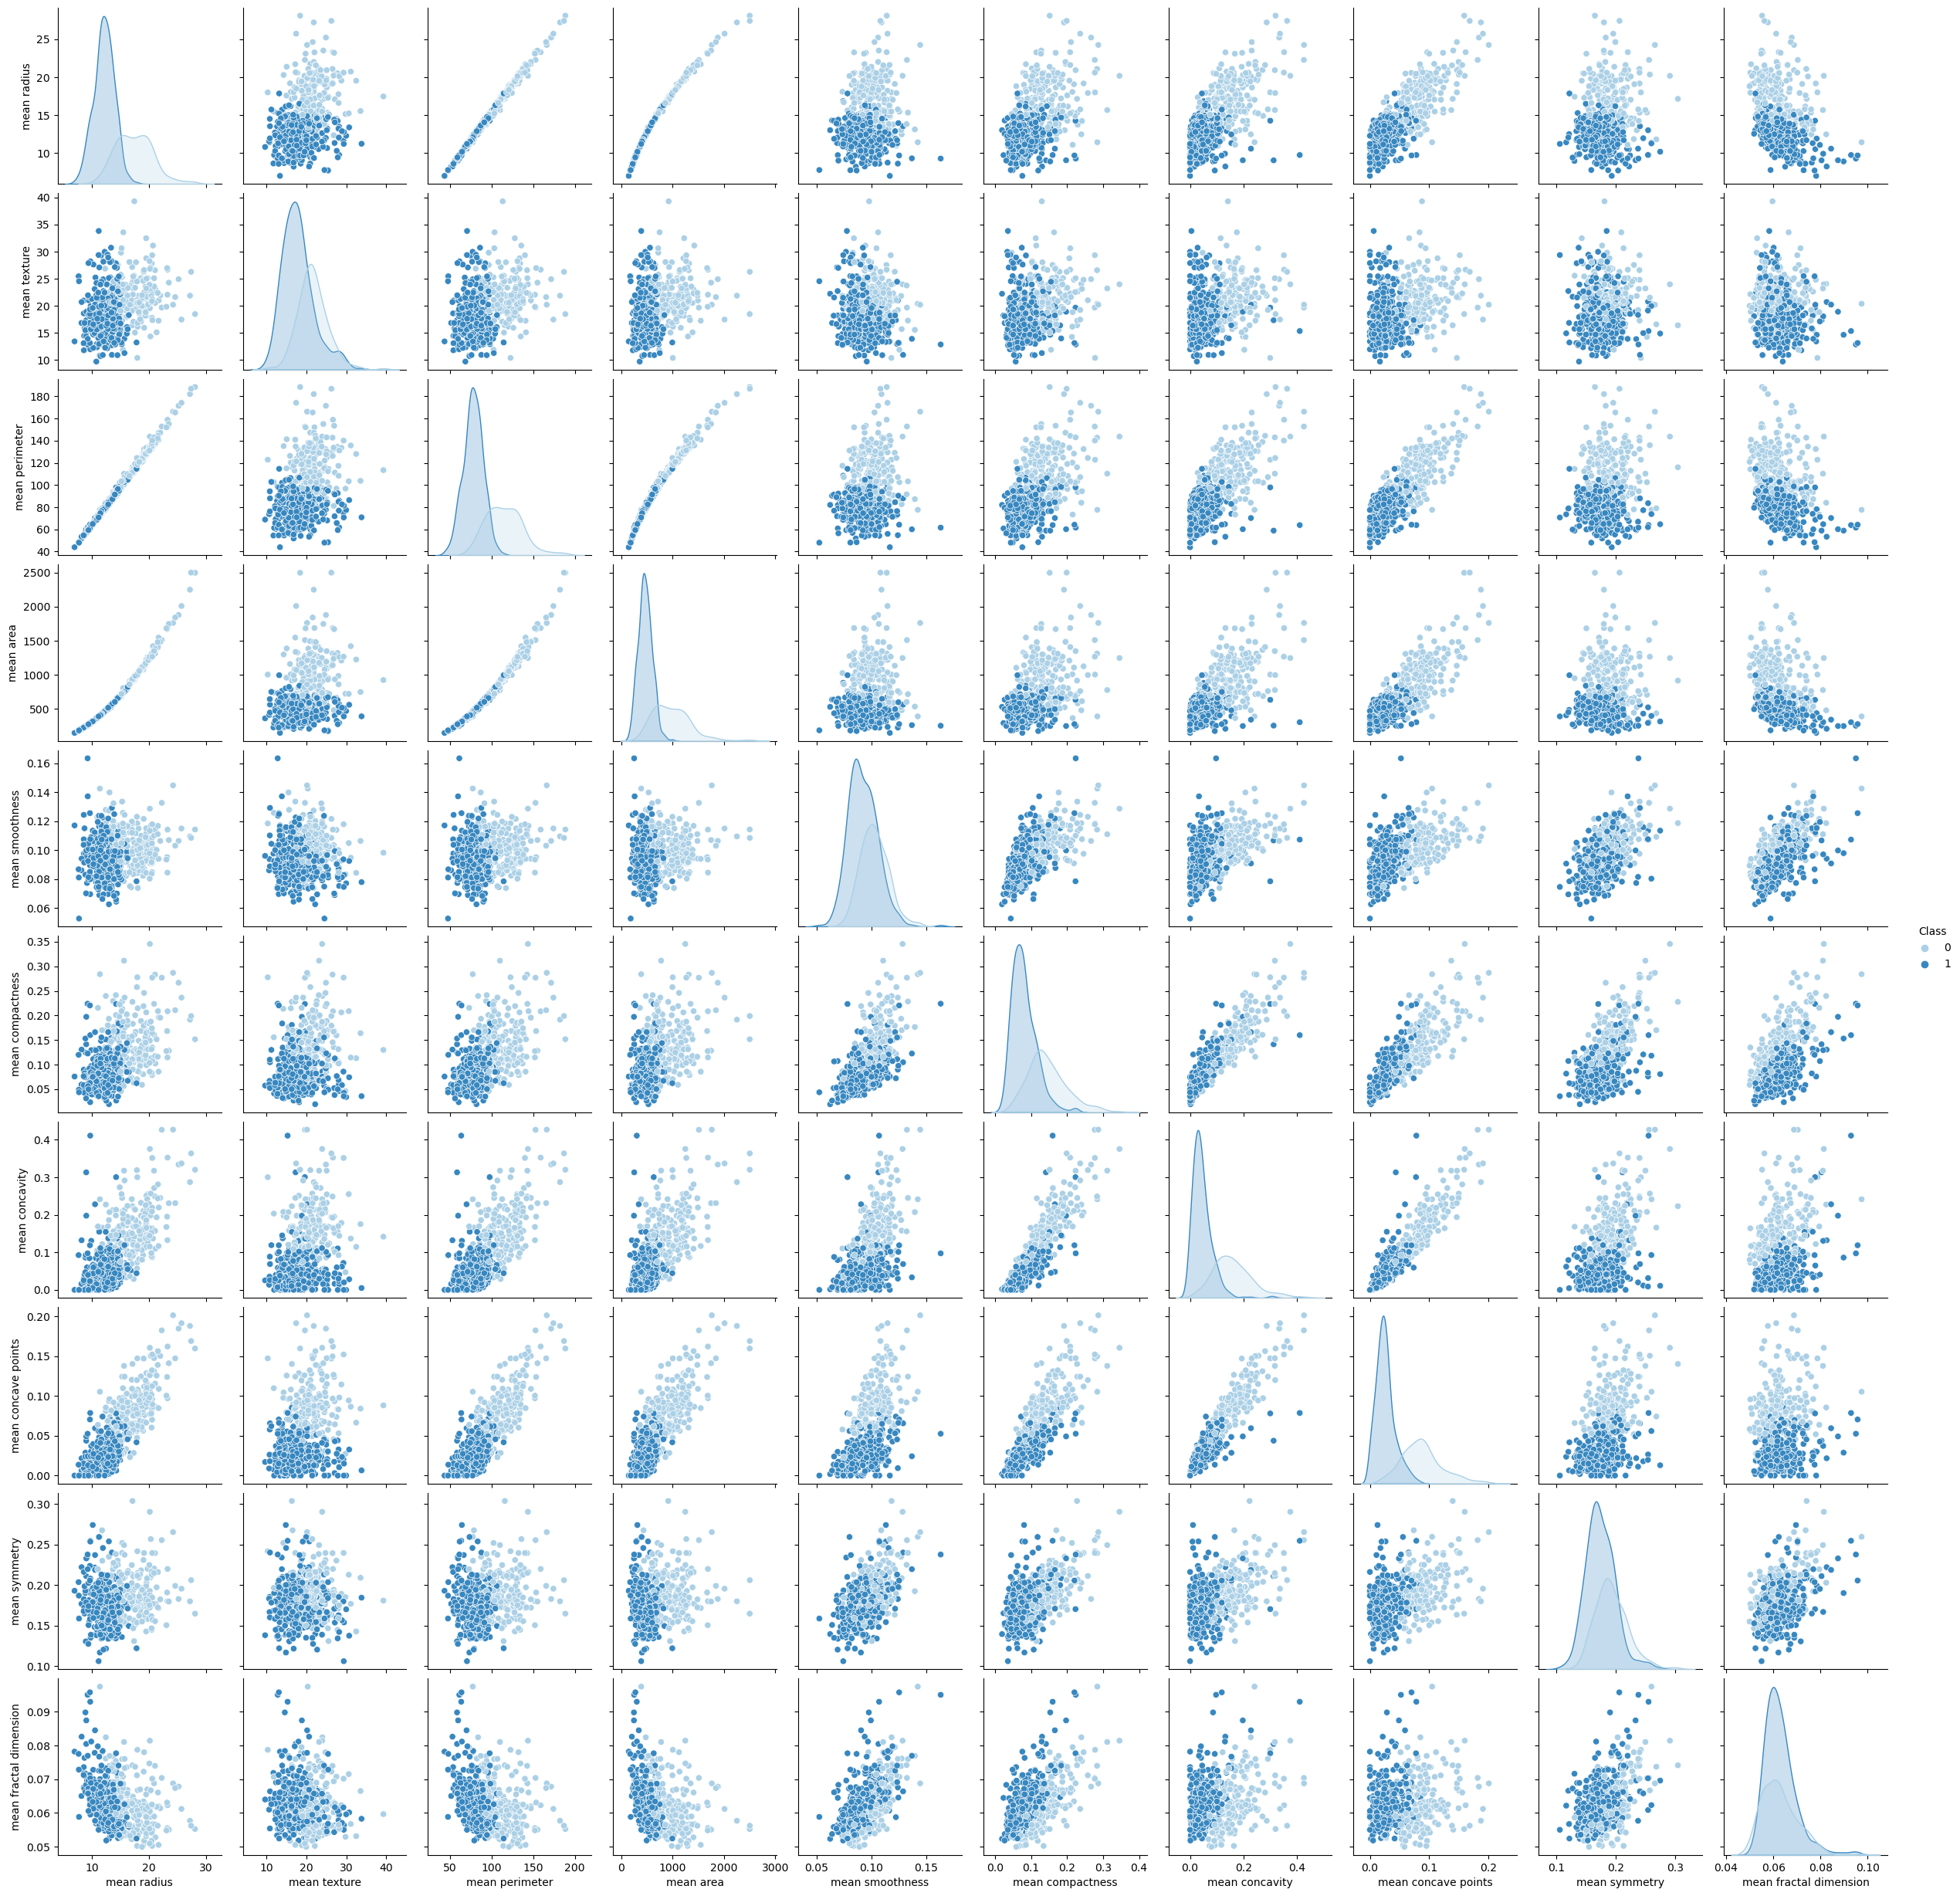

In [16]:
sns.pairplot(df1[m_col],hue='Class',palette='Blues',);

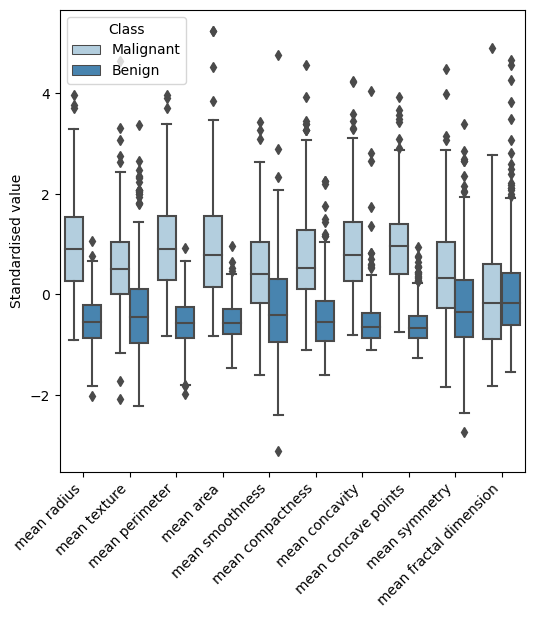

In [17]:
#https://www.kaggle.com/code/kanncaa1/feature-selection-and-data-visualization
plt.figure(figsize=(6,6))
data_dia = y_frame
data1 = df1
data_n_2 = (data1 - data1.mean()) / (data1.std())              # standardization
data1 = pd.concat([y_frame,data_n_2.iloc[:,0:10]],axis=1)
data1['Class']=data1['Class'].replace({1: 'Benign', 0: 'Malignant'})
ax = sns.boxplot(x='variable', y='value', hue='Class', data=pd.melt(data1, id_vars=['Class']),palette="Blues");
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right');
ax.set_xlabel("");
ax.set_ylabel("Standardised value");

# Methodologies

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

def select_dataset(selection):
    scaler = StandardScaler()          #Instantiate the scaler
    if (selection=="Full"):
        X1 = scaler.fit_transform(X_train[:,0:10] )   #Fit and transform the data
        X2 = scaler.transform(X_test[:,0:10])          #Fit and transform the validation set
    elif (selection=="Sparse"):
        sel=np.array([1,3,9]) #texture, area, symmetry
        X1 = scaler.fit_transform(X_train[:,sel])   
        X2 = scaler.transform(X_test[:,sel] )        
    elif (selection=="PCA-based"):
        sel=np.array([0,1,4,5,7,8,9]) #radius, texture, compactness, smoothness, c. points, symmetry and fractal-dim 
        X1 = scaler.fit_transform(X_train[:,sel])    
        X2 = scaler.transform(X_test[:,sel] )         
    elif (selection=="Create plot"): #for illustrating GPC
        sel=np.array([1,3]) #texture, area
        X1 = scaler.fit_transform(X_train[:,sel])    
        X2 = scaler.transform(X_test[:,sel] )  
    else:
        print("Choose Full, Sparse, PCA-based or Create plot")
    return X1,X2

scaled_X_train,scaled_X_test = select_dataset("Create plot")
print(scaled_X_train.shape)

(398, 2)


# Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

# Train a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(scaled_X_train, y_train)

# Use the trained classifier to make predictions on the train and test set
y_pred_NB_in = nb_classifier.predict(scaled_X_train)
y_pred_NB_out = nb_classifier.predict(scaled_X_test)

# Calculate the accuracy and F1 score of the classifier
accuracy_NB_in = accuracy_score(y_train, y_pred_NB_in)
accuracy_NB_out = accuracy_score(y_test, y_pred_NB_out)
f1_NB_in = f1_score(y_train,y_pred_NB_in)
f1_NB_out = f1_score(y_test,y_pred_NB_out)
print(f"In-sample accuracy: {accuracy_NB_in}")
print(f"Out-of-sample accuracy: {accuracy_NB_out}")
print(f"In-sample F1-score: {f1_NB_in}")
print(f"Out-of-sample F1-score: {f1_NB_out}")

In-sample accuracy: 0.9120603015075377
Out-of-sample accuracy: 0.9239766081871345
In-sample F1-score: 0.9304174950298211
Out-of-sample F1-score: 0.9406392694063928


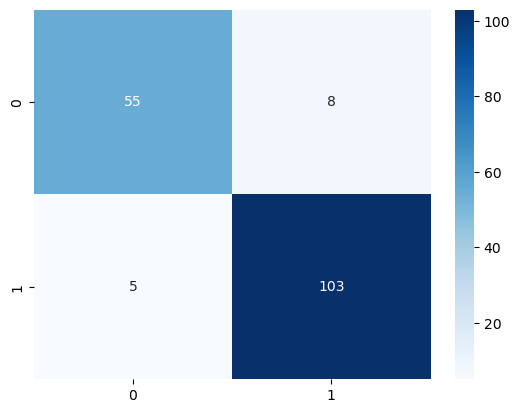

In [21]:
cm = confusion_matrix(y_test,y_pred_NB_out)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues");

# GP classification

In [39]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import *
from sklearn.gaussian_process.kernels import ConstantKernel as C
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

# Train a Gaussian Process classifier
#kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=2.5)
#kernel = C(1.0, (1e-3, 1e3)) *RationalQuadratic(length_scale=1.0, alpha=1.0, length_scale_bounds=(1e-05, 100000.0), alpha_bounds=(1e-05, 100000.0))
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-5, 1e5))
GPC_classifier = GaussianProcessClassifier(kernel=kernel)
GPC_classifier.fit(scaled_X_train, y_train)

# Use the trained classifier to make predictions on the train and test set
y_pred_GPC_in = GPC_classifier.predict(scaled_X_train)
y_pred_GPC_out = GPC_classifier.predict(scaled_X_test)

# Calculate the accuracy and F1 score of the classifier
accuracy_GPC_in = accuracy_score(y_train, y_pred_GPC_in)
accuracy_GPC_out = accuracy_score(y_test, y_pred_GPC_out)
f1_GPC_in = f1_score(y_train,y_pred_GPC_in)
f1_GPC_out = f1_score(y_test,y_pred_GPC_out)
print(f"In-sample accuracy: {accuracy_GPC_in}")
print(f"Out-of-sample accuracy: {accuracy_GPC_out}")
print(f"In-sample F1-score: {f1_GPC_in}")
print(f"Out-of-sample F1-score: {f1_GPC_out}")

In-sample accuracy: 0.9045226130653267
Out-of-sample accuracy: 0.9064327485380117
In-sample F1-score: 0.9254901960784314
Out-of-sample F1-score: 0.9266055045871558


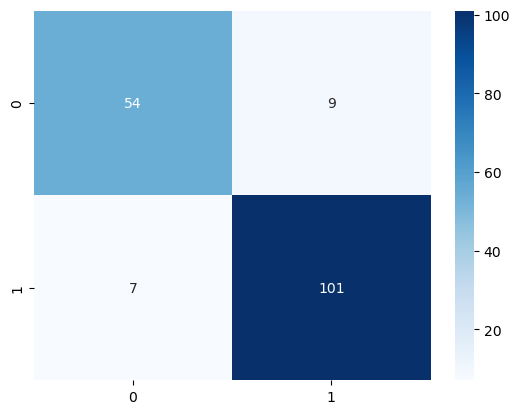

In [40]:
cm = confusion_matrix(y_test,y_pred_GPC_out)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues");

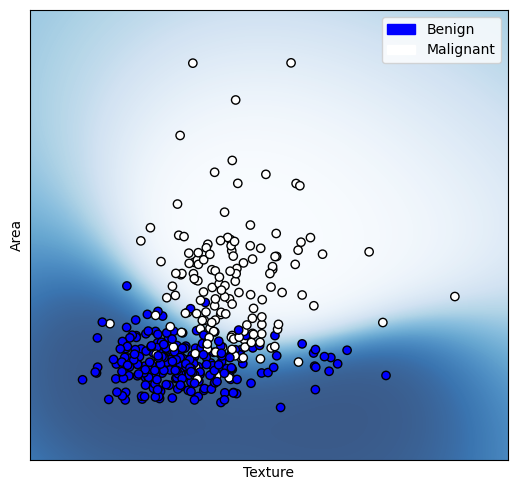

In [41]:
import matplotlib.patches as mpatches

########################################################################################################
######## set scaled_X_train,scaled_X_test = select_dataset("Create plot") and run previous code ########
########################################################################################################



h = .02  # step size in the mesh


# create a mesh to plot in
x_min, x_max = scaled_X_train[:, 0].min() - 1, scaled_X_train[:, 0].max() + 1
y_min, y_max = scaled_X_train[:, 1].min() - 1, scaled_X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))
plt.figure(figsize=(10, 5))

Z = GPC_classifier.predict_proba(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape((xx.shape[0], xx.shape[1], 2))  # change to 2 instead of 3
plt.imshow(Z[:, :, 1], extent=(x_min, x_max, y_min, y_max), origin="lower",
           cmap="Blues", 
           alpha=0.8)  # display only the probability of class 1

# Plot also the training points
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c=np.array(["white", "blue"])[y_train], edgecolors=(0, 0, 0))
plt.xlabel('Texture')
plt.ylabel('Area')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.tight_layout()
red_patch = mpatches.Patch(color='blue', label='Benign')
blue_patch = mpatches.Patch(color='white', label='Malignant')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

# Logistic regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

# Train a logistic regression classifier
logit = LogisticRegression(fit_intercept=True,solver='lbfgs')
logit.fit(scaled_X_train,y_train)

# Use the trained classifier to make predictions on the train and test set
y_pred_LR_in = logit.predict(scaled_X_train)
y_pred_LR_out = logit.predict(scaled_X_test)

# Calculate the accuracy and F1 score of the classifier
accuracy_LR_in = accuracy_score(y_train, y_pred_LR_in)
accuracy_LR_out = accuracy_score(y_test, y_pred_LR_out)
f1_LR_in = f1_score(y_train,y_pred_LR_in)
f1_LR_out = f1_score(y_test,y_pred_LR_out)
print(f"In-sample accuracy: {accuracy_LR_in}")
print(f"Out-of-sample accuracy: {accuracy_LR_out}")
print(f"In-sample F1-score: {f1_LR_in}")
print(f"Out-of-sample F1-score: {f1_LR_out}")

In-sample accuracy: 0.9447236180904522
Out-of-sample accuracy: 0.935672514619883
In-sample F1-score: 0.9565217391304348
Out-of-sample F1-score: 0.9493087557603688


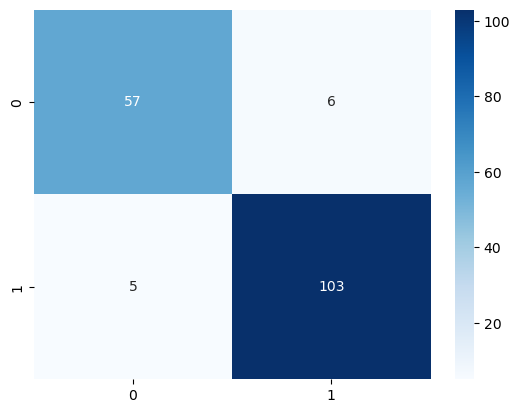

In [30]:
cm = confusion_matrix(y_test,y_pred_LR_out)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues");

# Gaussian Process Regression

In [31]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

# Train a Gaussian Process classifier
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-5, 1e5))
#kernel = C(1.0, (1e-3, 1e3)) * Matern(length_scale=1.0, length_scale_bounds=(1e-05, 100000.0), nu=1.5)
#kernel = C(1.0, (1e-3, 1e3)) *RationalQuadratic(length_scale=1.0, alpha=1.0, length_scale_bounds=(1e-05, 100000.0), alpha_bounds=(1e-05, 100000.0))
#kernel = DotProduct()
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=10,alpha=0.05)
gp.fit(scaled_X_train, y_train)

# Use the trained classifier to make predictions on the train and test set
y_pred_gp_in_p,sig_in = gp.predict(scaled_X_train,return_std=True)
y_pred_gp_in = np.where(y_pred_gp_in_p > 0.5, 1, 0) #[1 if x > 0 else 0 for x in lst]
y_pred_gp_out_p,sig_out = gp.predict(scaled_X_test,return_std=True)
y_pred_gp_out = np.where(y_pred_gp_out_p > 0.5, 1, 0) #[1 if x > 0 else 0 for x in lst]

# Calculate the accuracy and F1 score of the classifier
accuracy_gp_in = accuracy_score(y_train, y_pred_gp_in)
accuracy_gp_out = accuracy_score(y_test, y_pred_gp_out)
f1_gp_in = f1_score(y_train,y_pred_gp_in)
f1_gp_out = f1_score(y_test,y_pred_gp_out)
print(f"In-sample accuracy: {accuracy_gp_in}")
print(f"Out-of-sample accuracy: {accuracy_gp_out}")
print(f"In-sample F1-score: {f1_gp_in}")
print(f"Out-of-sample F1-score: {f1_gp_out}")

In-sample accuracy: 0.9623115577889447
Out-of-sample accuracy: 0.9766081871345029
In-sample F1-score: 0.9702970297029703
Out-of-sample F1-score: 0.9818181818181818


<Axes: >

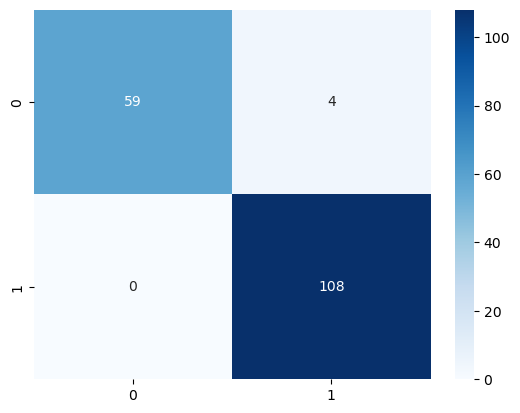

In [32]:
cm = confusion_matrix(y_test,y_pred_gp_out)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")

In [33]:
mean, var =gp.predict(scaled_X_test, return_std=True)
lower=mean-1.67*var
upper=mean+1.67*var
vec=np.array([[mean],[lower],[upper]])[:,0,:]
print(np.round(vec,2).T)

[[ 0.8   0.73  0.86]
 [-0.07 -0.18  0.04]
 [ 0.05 -0.06  0.17]
 [ 0.99  0.89  1.08]
 [ 1.09  1.01  1.18]
 [ 0.03 -0.37  0.43]
 [ 0.04 -0.15  0.23]
 [ 0.37  0.25  0.5 ]
 [ 0.57  0.46  0.67]
 [ 0.99  0.85  1.12]
 [ 0.74  0.64  0.83]
 [ 0.22  0.13  0.31]
 [ 0.73  0.62  0.83]
 [-0.11 -0.24  0.02]
 [ 1.09  1.    1.17]
 [ 0.05 -0.34  0.43]
 [ 0.9   0.8   0.99]
 [ 1.1   1.01  1.2 ]
 [ 0.93  0.64  1.23]
 [ 0.   -0.14  0.14]
 [ 0.87  0.77  0.96]
 [ 0.95  0.88  1.02]
 [ 0.07 -0.12  0.26]
 [ 1.04  0.92  1.16]
 [ 1.06  0.91  1.21]
 [ 0.71  0.36  1.05]
 [ 1.08  0.98  1.18]
 [ 0.97  0.81  1.13]
 [ 1.01  0.94  1.07]
 [ 0.01 -0.13  0.14]
 [ 0.94  0.84  1.04]
 [ 1.04  0.96  1.12]
 [ 0.91  0.65  1.17]
 [ 1.03  0.95  1.1 ]
 [ 1.07  0.98  1.15]
 [ 0.92  0.84  1.  ]
 [ 0.46  0.35  0.58]
 [ 1.01  0.84  1.18]
 [ 0.02 -0.06  0.09]
 [ 0.67  0.58  0.76]
 [ 1.08  0.95  1.2 ]
 [ 0.04 -0.1   0.18]
 [ 0.89  0.79  0.98]
 [ 1.04  0.98  1.1 ]
 [ 0.51  0.25  0.76]
 [ 0.97  0.88  1.06]
 [ 0.93  0.59  1.26]
 [ 1.19  1.  

In [36]:
summary = pd.DataFrame(np.array([[accuracy_LR_in,accuracy_LR_out, f1_LR_in, f1_LR_out],
                                 [accuracy_gp_in,accuracy_gp_out, f1_gp_in, f1_gp_out],
                                 [accuracy_NB_in,accuracy_NB_out, f1_NB_in, f1_NB_out],
                                 [accuracy_GPC_in,accuracy_GPC_out, f1_GPC_in, f1_GPC_out],
                                ]), columns=["In-sample accuracy","Out-of-sample accuracy",
                                "In-sample F1-score","Out-of-sample F1-score"])
summary.index =["Logistic Regression","GP regression","NB classifier","GP classification"]
# define a formatting function
def format_pct(x):
    return "{:.3%}".format(x)

# apply formatting function to dataframe
summary.iloc[:,0:2] = summary.iloc[:,0:2].applymap(format_pct)

# display the formatted dataframe

#print(summary.to_latex())
summary

In-sample accuracy Out-of-sample accuracy  \
Logistic Regression            94.472%                93.567%   
GP regression                  96.231%                97.661%   
NB classifier                  91.206%                92.398%   
GP classification              96.231%                97.661%   

                     In-sample F1-score  Out-of-sample F1-score  
Logistic Regression            0.956522                0.949309  
GP regression                  0.970297                0.981818  
NB classifier                  0.930417                0.940639  
GP classification              0.970179                0.981651

# Bayesian Neural Network

See other notebook